In [2]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

## Functions

In [3]:
def KPZ(num,highs): #KPZ Function
    
    m = max(highs)
    
    if(high[num] == m):
        high[num] += 1
    else:
        high[num] = m




## Generate Data


In [7]:

length = 200
point_number = 6000000


In [100]:
start = time.time()
stds = []

time1 = np.array([])

for k in range(1):
    x = 4
    std = np.array([])
    high = np.zeros(length)
    if (k == 0):
        point = []
    
    for i in range(point_number):    
        
        count = np.random.randint(0, length)
        KPZ(count,[high[(count-1)%length],high[count]+1,high[(count+1)%length]])
       
        if (i == np.floor(1.3**(x))):
            if (k == 0):
                time1 = np.append(time1,i)
            std = np.append(std,np.std(high))
            x +=1
        if (k == 0):                
            point.append([count,high[count]])
    stds.append(std) 
stds = np.transpose(np.array(stds))

end = time.time()
time_taken = end - start

In [101]:
final_std = np.zeros(len(stds))
for k in range(len(stds)):
    final_std[k] = np.mean(stds[k])


In [54]:
print(time_taken)

2748.2968621253967


زمان گرفته شده برای انجام 100 آزمایش بروی 6000000 ذره 45 دقیقه بود

## Statistic

In [57]:
pointDF = pd.DataFrame(point)
data = np.transpose(np.array([time1,final_std]))
data = pd.DataFrame(data,columns=['Time','Std'])
#len(final_std)

### save data

In [58]:
data.to_csv(r'C:\Users\Mahdi\Desktop\programing\python project\Comphys\HW2\Statistical Data KPZ')
pointDF.to_csv(r'C:\Users\Mahdi\Desktop\programing\python project\Comphys\HW2\Point Data KPZ')

### Read data for Different length

In [5]:
data = pd.read_csv('Statistical Data KPZ3')


coef11 = np.polyfit(np.log(data['Time'][29:35]),np.log(data['Std3'][29:35]),1)
betha = coef11[0]
coef20 = np.polyfit(np.log(data['Time'][45:]),np.log(data['Std3'][45:]),1)


## plot for on lattice

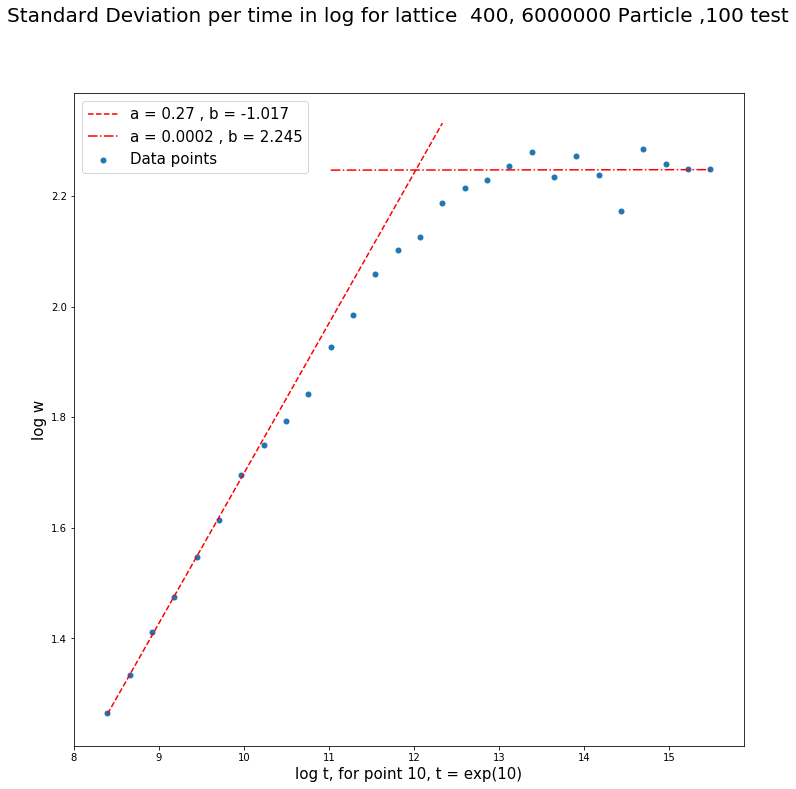

In [8]:
fig = plt.figure(figsize=(12,12))

fig.suptitle('Standard Deviation per time in log for lattice  400, %i Particle ,100 test'%(point_number),fontsize=20)

plt.plot(np.log(data['Time'][28:44]),np.polyval(coef11,np.log(data['Time'][28:44])),'r--',label = 'a = 0.27 , b = -1.017' )
plt.plot(np.log(data['Time'][38:]),np.polyval(coef20,np.log(data['Time'][38:])),'r-.',label = 'a = 0.0002 , b = 2.245')
plt.scatter(np.log(data['Time'][28:]),np.log(data['Std3'][28:]),marker='o',linewidths=0.01,label = 'Data points')

plt.xlabel('log t, for point 10, t = exp(10)', fontsize=15)
plt.ylabel('log w', fontsize=15)

leg = plt.legend(fontsize = 15);
#plt.savefig('KPZ fig1')

## plot Standard Deviation per time for different lattice

In [13]:
data = pd.read_csv('Statistical Data KPZ')
data1 = pd.read_csv('Statistical Data KPZ1')
data2 = pd.read_csv('Statistical Data KPZ2')
data3 = pd.read_csv('Statistical Data KPZ3')
data4 = pd.read_csv('Statistical Data KPZ4')

from functools import reduce

dfs = [data,data1,data2,data3,data4]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Time'), dfs)
datas = df_final.drop(columns=['Unnamed: 0_x' , 'Unnamed: 0_y'])


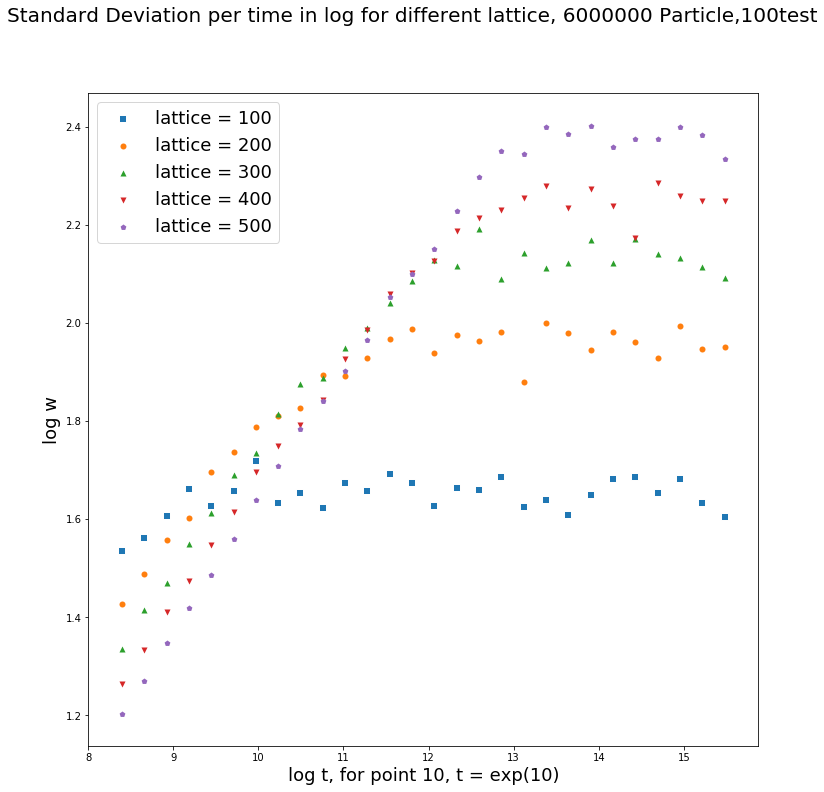

In [14]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
fig.suptitle('Standard Deviation per time in log for different lattice, 6000000 Particle,100test',fontsize=20)

ax.scatter(np.log(datas['Time'][28:]),np.log(datas['Std1'][28:]),marker='s',linewidths=0.01,label = 'lattice = 100')
ax.scatter(np.log(datas['Time'][28:]),np.log(datas['Std'][28:]),marker='o',linewidths=0.01,label = 'lattice = 200')
ax.scatter(np.log(datas['Time'][28:]),np.log(datas['Std2'][28:]),marker='^',linewidths=0.01,label = 'lattice = 300')
ax.scatter(np.log(datas['Time'][28:]),np.log(datas['Std3'][28:]),marker='v',linewidths=0.01,label = 'lattice = 400')
ax.scatter(np.log(datas['Time'][28:]),np.log(datas['Std4'][28:]),marker='p',linewidths=0.01,label = 'lattice = 500')

ax.set_xlabel('log t, for point 10, t = exp(10)', fontsize=18)
ax.set_ylabel('log w', fontsize=18)

leg = ax.legend(fontsize = 18);

#plt.savefig('KPZ fig2')

در دستور زیر تلاش داشتم با استفاده از بررسی دانه دانه نقاط از انتهای نمودار محل انهنا را مشخص کنم که به علت جابه‌جایی در نقاط پایانی با خطا رو برو شدم و نقاطی را دریافت کردم که در نمودار با محل انهنا فاصله داشتند به همین دلیل در سلول پایین‌تر به طور چشمی از نمودار محل را مشخص کرد و با بررسی نقاط اطراف بهترین نقطه رو انتخاب کردم 

num = len(time)


for i in range(num-6,0,-1):
    coef2 = np.polyfit(np.log(time[i:num-5]),np.log(datas['Std4'][i:num-5]),1)
    if abs(coef2[0]-0) < 10**-4:
        count = i
        break
Ws1 = final_std[count]
ts1 = final_std[count]

 

## plot Standard Deviation per length 

In [23]:
coef20 = np.polyfit(np.log(datas['Time'][42:]),np.log(datas['Std'][42:]),1)
coef21 = np.polyfit(np.log(datas['Time'][32:53]),np.log(datas['Std1'][32:53]),1)
coef22 = np.polyfit(np.log(datas['Time'][44:54]),np.log(datas['Std2'][44:54]),1)
coef23 = np.polyfit(np.log(datas['Time'][45:]),np.log(datas['Std3'][45:]),1)
coef24 = np.polyfit(np.log(datas['Time'][48:]),np.log(datas['Std4'][48:]),1)
Wss;

[5.0874761700656865,
 6.6474183977293215,
 8.947139998527984,
 9.301973835338126,
 10.860004312389307]

In [12]:
Wss = [datas['Std1'][32],datas['Std'][37],datas['Std2'][44],datas['Std3'][45],datas['Std4'][48]]
Length = [100,200,300,400,500]

coef3 = np.polyfit(np.log(Length),np.log(Wss),1)
alpha = coef3[0]
alpha;

0.47173948998349047

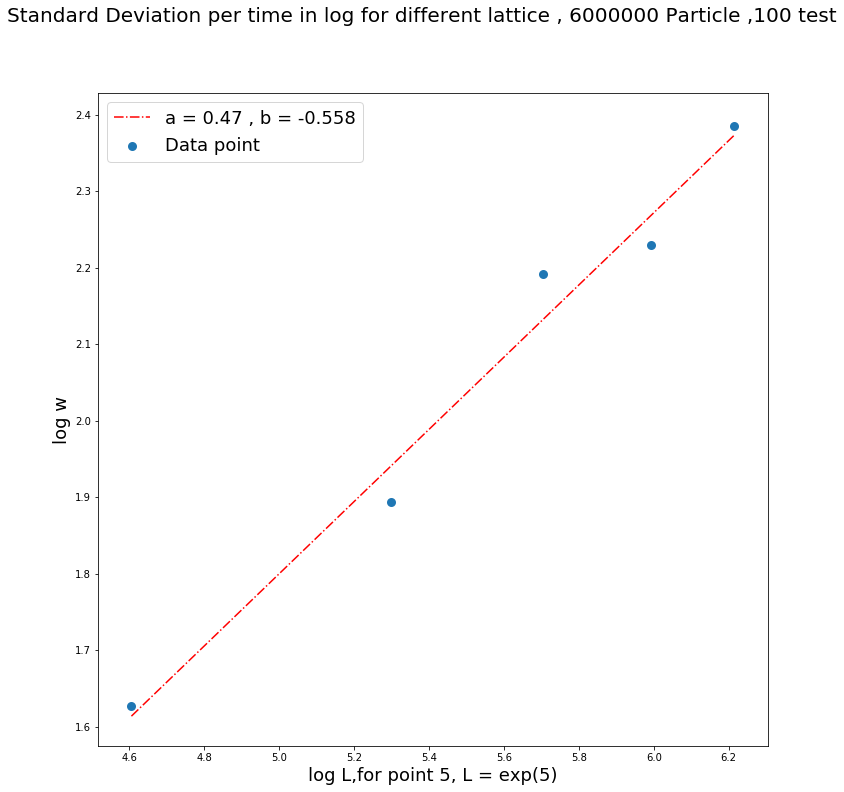

In [19]:
fig = plt.figure(figsize=(12,12))

fig.suptitle('Standard Deviation per time in log for different lattice , %i Particle ,100 test'%(point_number),fontsize=20)

plt.plot(np.log(Length),np.polyval(coef3,np.log(Length)),'r-.',label = 'a = 0.47 , b = -0.558')
plt.scatter(np.log(Length),np.log(Wss),marker='o',linewidths='3',label = 'Data point')

plt.xlabel('log L,for point 5, L = exp(5)', fontsize=18)
plt.ylabel('log w', fontsize=18)

leg = plt.legend(fontsize = 18);

#plt.savefig('KPZ fig3')

# Result

In [22]:
print('betha = %.3f , error = %.2f percent'%(betha,((0.33-betha)/0.33)*100))
print('alpha = %.3f, error = %.3f percent'%(alpha,((0.47-alpha)/0.47)*100))


betha = 0.272 , error = 17.67 percent
alpha = 0.472, error = -0.370 percent


## Simulation

In [5]:
pointDF = pd.read_csv('Point Data KPZ')
pointDF = pointDF.drop(columns=['Unnamed: 0'])
point = pointDF.as_matrix()

C:\Users\Mahdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
%matplotlib
point_number1 = 10000
point = np.transpose(np.array(point))

step = int(np.floor(point_number1 / 4))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.axis('off')


plt.ion()
fig.show()
fig.canvas.draw()

for i in range(0,point_number1,step):
    if (i/step)%2 == 0 :
        ax.scatter(point[0][i:i+step],point[1][i:i+step],marker='.',c = 'b')
    else:
        ax.scatter(point[0][i:i+step],point[1][i:i+step],marker='.',c = 'r')
    fig.canvas.draw()
    plt.pause(1) 

#plt.savefig('KPZ fig4')

Using matplotlib backend: Qt5Agg
